In [ ]:
dbutils.fs.ls("/databricks-datasets/Rdatasets/data-001/doc/ggplot2")

Out[1]: [FileInfo(path='dbfs:/databricks-datasets/Rdatasets/data-001/doc/ggplot2/diamonds.html', name='diamonds.html', size=1490),
 FileInfo(path='dbfs:/databricks-datasets/Rdatasets/data-001/doc/ggplot2/economics.html', name='economics.html', size=1726),
 FileInfo(path='dbfs:/databricks-datasets/Rdatasets/data-001/doc/ggplot2/midwest.html', name='midwest.html', size=1865),
 FileInfo(path='dbfs:/databricks-datasets/Rdatasets/data-001/doc/ggplot2/movies.html', name='movies.html', size=2095),
 FileInfo(path='dbfs:/databricks-datasets/Rdatasets/data-001/doc/ggplot2/mpg.html', name='mpg.html', size=1415),
 FileInfo(path='dbfs:/databricks-datasets/Rdatasets/data-001/doc/ggplot2/msleep.html', name='msleep.html', size=1629),
 FileInfo(path='dbfs:/databricks-datasets/Rdatasets/data-001/doc/ggplot2/presidential.html', name='presidential.html', size=765),
 FileInfo(path='dbfs:/databricks-datasets/Rdatasets/data-001/doc/ggplot2/rst/', name='rst/', size=0),
 FileInfo(path='dbfs:/databricks-datasets/Rdatasets/data-001/doc/ggplot2/seals.html', name='seals.html', size=1136)]

In [ ]:
displayHTML(sc.wholeTextFiles("/databricks-datasets/Rdatasets/data-001/doc/ggplot2/diamonds.html").take(1)[0][1])

diamonds,R Documentation


In [ ]:
# загрузка данных в Pandas
import pandas
import io
from pyspark.sql import *
localData = sc.wholeTextFiles("/databricks-datasets/Rdatasets/data-001/csv/ggplot2/diamonds.csv").collect()[0][1]
output = io.StringIO(localData)
pandasData = pandas.read_csv(output)
pandasData = pandasData.iloc[:,1:]

In [ ]:
pandasData

Out[4]:

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


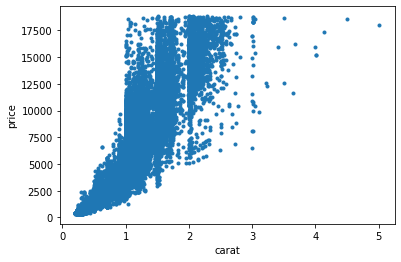

In [ ]:
# пример визуализации
import matplotlib.pyplot as plt
plt.clf()
plt.plot(pandasData['carat'], pandasData['price'], '.')
plt.xlabel('carat')
plt.ylabel('price')
display()

In [ ]:
# в Spark DF
sparkDataframe = sqlContext.createDataFrame(pandasData)
display(sparkDataframe)

carat,cut,color,clarity,depth,table,price,x,y,z
0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
0.29,Premium,I,VS2,62.4,58.0,334,4.2,4.23,2.63
0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
0.23,Very Good,H,VS1,59.4,61.0,338,4.0,4.05,2.39


In [ ]:
# replace, замена на числовые значения
pandasData['cut'] = pandasData['cut'].replace({'Fair':0, 'Good':1, 'Very Good':2, 'Premium':3, 'Ideal':4})
pandasData['color'] = pandasData['color'].replace({'J':0, 'I':1, 'H':2, 'G':3, 'F':4, 'E':5, 'D':6})
pandasData['clarity'] = pandasData['clarity'].replace({'I1':0, 'SI1':1, 'SI2':2, 'VS1':3, 'VS2':4, 'VVS1':5, 'VVS2':6, 'IF':7})
pandasData

Out[6]:

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,4,5,2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,5,1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,5,3,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,1,4,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,0,2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,4,6,1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,1,6,1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,2,6,1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,3,2,2,61.0,58.0,2757,6.15,6.12,3.74


In [ ]:
# ограничение фичей для моедли
labels = pandasData['price']
featureNames = ['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z']
features = pandasData[featureNames]

In [ ]:
# применение нормолайзера
from sklearn.preprocessing import normalize
features = normalize(features, axis=0)
features

Out[8]: array([[0.00106702, 0.00553547, 0.005655 , ..., 0.0029123 , 0.00293078,
 0.00289958],
 [0.00097424, 0.0041516 , 0.005655 , ..., 0.00286806, 0.00282769,
 0.00275639],
 [0.00106702, 0.00138387, 0.005655 , ..., 0.00298603, 0.00299705,
 0.00275639],
 ...,
 [0.00324745, 0.00276773, 0.006786 , ..., 0.00417307, 0.00418262,
 0.00424794],
 [0.00398973, 0.0041516 , 0.002262 , ..., 0.00453434, 0.00450662,
 0.00446272],
 [0.00347941, 0.00553547, 0.006786 , ..., 0.0042984 , 0.00432253,
 0.0043434 ]])

In [ ]:
# разбиение на группы (sklearn)
from sklearn.model_selection import train_test_split
trainingFeatures, testFeatures, trainingLabels, testLabels   = train_test_split(features, labels, test_size=0.3)
ntrain, ntest = len(trainingLabels), len(testLabels)

In [ ]:
# обучение простой модели
from sklearn import linear_model
origAlpha = 0.5 # "alpha" регуляризация
origClf = linear_model.Ridge(alpha=origAlpha)
origClf.fit(features, labels)

for i in range(len(featureNames)):
    print('%g\t%s' % (origClf.coef_[i], featureNames[i]))

503932	carat
 -668.814	cut
 -36580.6	color
 4104.09	clarity
 -887.179	depth
 4074.86	table
 178054	x
 176814	y
 175385	z

In [ ]:
origScore = origClf.score(trainingFeatures, trainingLabels)
origScore

Out[11]: 0.5600484914274089

### Spark

In [ ]:
# alpha параметр для модели
alphas = [0.0, 0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0, 0.03]

tasks = []
for alpha in alphas:
    for fold in range(10):
        tasks = tasks + [(alpha, fold)]

In [ ]:
# набор задач для обучения модели
tasks

Out[13]: [(0.0, 0),
 (0.0, 1),
 (0.0, 2),
 (0.0, 3),
 (0.0, 4),
 (0.0, 5),
 (0.0, 6),
 (0.0, 7),
 (0.0, 8),
 (0.0, 9),
 (0.0001, 0),
 (0.0001, 1),
 (0.0001, 2),
 (0.0001, 3),
 (0.0001, 4),
 (0.0001, 5),
 (0.0001, 6),
 (0.0001, 7),
 (0.0001, 8),
 (0.0001, 9),
 (0.001, 0),
 (0.001, 1),
 (0.001, 2),
 (0.001, 3),
 (0.001, 4),
 (0.001, 5),
 (0.001, 6),
 (0.001, 7),
 (0.001, 8),
 (0.001, 9),
 (0.01, 0),
 (0.01, 1),
 (0.01, 2),
 (0.01, 3),
 (0.01, 4),
 (0.01, 5),
 (0.01, 6),
 (0.01, 7),
 (0.01, 8),
 (0.01, 9),
 (0.1, 0),
 (0.1, 1),
 (0.1, 2),
 (0.1, 3),
 (0.1, 4),
 (0.1, 5),
 (0.1, 6),
 (0.1, 7),
 (0.1, 8),
 (0.1, 9),
 (1.0, 0),
 (1.0, 1),
 (1.0, 2),
 (1.0, 3),
 (1.0, 4),
 (1.0, 5),
 (1.0, 6),
 (1.0, 7),
 (1.0, 8),
 (1.0, 9),
 (10.0, 0),
 (10.0, 1),
 (10.0, 2),
 (10.0, 3),
 (10.0, 4),
 (10.0, 5),
 (10.0, 6),
 (10.0, 7),
 (10.0, 8),
 (10.0, 9),
 (100.0, 0),
 (100.0, 1),
 (100.0, 2),
 (100.0, 3),
 (100.0, 4),
 (100.0, 5),
 (100.0, 6),
 (100.0, 7),
 (100.0, 8),
 (100.0, 9),
 (1000.0, 0),
 (1000.0, 1),
 (1000.0, 2),
 (1000.0, 3),
 (1000.0, 4),
 (1000.0, 5),
 (1000.0, 6),
 (1000.0, 7),
 (1000.0, 8),
 (1000.0, 9),
 (0.03, 0),
 (0.03, 1),
 (0.03, 2),
 (0.03, 3),
 (0.03, 4),
 (0.03, 5),
 (0.03, 6),
 (0.03, 7),
 (0.03, 8),
 (0.03, 9)]

In [ ]:
# создаем RDD объект
taskRDD = sc.parallelize(tasks, numSlices=len(tasks))

In [ ]:
taskRDD.take(1)

Out[15]: [(0.0, 0)]

In [ ]:
# данные в Spark в виде in memory переменной
trainingLabelsBroadcast  = sc.broadcast(trainingLabels)
trainingFeaturesBroadcast  = sc.broadcast(trainingFeatures)

In [ ]:
trainingLabelsBroadcast.value

Out[19]: 15442 6183
18299 7438
15360 605
460 2817
42427 1312
22198 10238
44204 1569
49929 2184
28293 432
8521 4426
Name: price, dtype: int64

In [ ]:
def trainOneModel(alpha, fold):
    # функция обучения модели из 
    trainIndex, valIndex = [], []
    fold_ = 0
  
    #for trainIndex_, valIndex_ in kf.split(trainingFeatures):
    #    trainIndex, valIndex = trainIndex_, valIndex_
    #    break
   
    localTrainingFeatures = trainingFeaturesBroadcast.value
    localTrainingLabels = trainingLabelsBroadcast.value
  
    # индексы
    X_train, X_val = localTrainingFeatures[:30000], localTrainingFeatures[30000:]
    Y_train, Y_val = localTrainingLabels[:30000], localTrainingLabels[30000:]
  
  
    clt =  linear_model.Ridge(alpha=alpha)
    clt.fit(X_train, Y_train)
  
    score = clt.score(X_val, Y_val)
  
  
  
    return clt, score, alpha, fold

In [ ]:
import pyspark.sql.functions as F

df = spark.createDataFrame([(["c", "b", "a","e","f"],)], ['arraydata'])
user_func = udf (lambda x,y: [i for i, e in enumerate(x) if e==y ])
newdf = df.withColumn('item_position',user_func(df.arraydata, F.lit('b')))

newdf.show()

+---------------+-------------+
 arraydata|item_position|
+---------------+-------------+
[c, b, a, e, f]| [1]|
+---------------+-------------+

In [ ]:
df = spark.createDataFrame([("a", 1), ("b", 2), ("c", 3)], ["letter", "name"])

def getrows(df, rownums=None):
    return df.rdd.zipWithIndex().filter(lambda x: x[1] in rownums).map(lambda x: x[0])

# указываем позицию и получаем данные  данные
spark.createDataFrame(getrows(df, rownums=[0])).show()

+------+----+
letter|name|
+------+----+
 a| 1|
+------+----+

In [ ]:
trained = taskRDD.map(lambda x: trainOneModel(x[0], x[1]))
trained.cache()
trained.take(27)

Out[22]: [(Ridge(alpha=0.0), 0.8936764471940355, 0.0, 0),
 (Ridge(alpha=0.0), 0.8936764471940355, 0.0, 1),
 (Ridge(alpha=0.0), 0.8936764471940355, 0.0, 2),
 (Ridge(alpha=0.0), 0.8936764471940355, 0.0, 3),
 (Ridge(alpha=0.0), 0.8936764471940355, 0.0, 4),
 (Ridge(alpha=0.0), 0.8936764471940355, 0.0, 5),
 (Ridge(alpha=0.0), 0.8936764471940355, 0.0, 6),
 (Ridge(alpha=0.0), 0.8936764471940355, 0.0, 7),
 (Ridge(alpha=0.0), 0.8936764471940355, 0.0, 8),
 (Ridge(alpha=0.0), 0.8936764471940355, 0.0, 9),
 (Ridge(alpha=0.0001), 0.8926444526201097, 0.0001, 0),
 (Ridge(alpha=0.0001), 0.8926444526201097, 0.0001, 1),
 (Ridge(alpha=0.0001), 0.8926444526201097, 0.0001, 2),
 (Ridge(alpha=0.0001), 0.8926444526201097, 0.0001, 3),
 (Ridge(alpha=0.0001), 0.8926444526201097, 0.0001, 4),
 (Ridge(alpha=0.0001), 0.8926444526201097, 0.0001, 5),
 (Ridge(alpha=0.0001), 0.8926444526201097, 0.0001, 6),
 (Ridge(alpha=0.0001), 0.8926444526201097, 0.0001, 7),
 (Ridge(alpha=0.0001), 0.8926444526201097, 0.0001, 8),
 (Ridge(alpha=0.0001), 0.8926444526201097, 0.0001, 9),
 (Ridge(alpha=0.001), 0.8901742412774253, 0.001, 0),
 (Ridge(alpha=0.001), 0.8901742412774253, 0.001, 1),
 (Ridge(alpha=0.001), 0.8901742412774253, 0.001, 2),
 (Ridge(alpha=0.001), 0.8901742412774253, 0.001, 3),
 (Ridge(alpha=0.001), 0.8901742412774253, 0.001, 4),
 (Ridge(alpha=0.001), 0.8901742412774253, 0.001, 5),
 (Ridge(alpha=0.001), 0.8901742412774253, 0.001, 6)]

In [ ]:
trained.unpersist()

Out[135]: PythonRDD[22] at RDD at PythonRDD.scala:58

In [ ]:
trained.take(27)

Out[136]: [(Ridge(alpha=0.0), 0.8889443493765385, 0.0, 0),
 (Ridge(alpha=0.0), 0.8889443493765385, 0.0, 1),
 (Ridge(alpha=0.0), 0.8889443493765385, 0.0, 2),
 (Ridge(alpha=0.0001), 0.888953525642304, 0.0001, 0),
 (Ridge(alpha=0.0001), 0.888953525642304, 0.0001, 1),
 (Ridge(alpha=0.0001), 0.888953525642304, 0.0001, 2),
 (Ridge(alpha=0.001), 0.887655286104494, 0.001, 0),
 (Ridge(alpha=0.001), 0.887655286104494, 0.001, 1),
 (Ridge(alpha=0.001), 0.887655286104494, 0.001, 2),
 (Ridge(alpha=0.01), 0.8778125685095606, 0.01, 0),
 (Ridge(alpha=0.01), 0.8778125685095606, 0.01, 1),
 (Ridge(alpha=0.01), 0.8778125685095606, 0.01, 2),
 (Ridge(alpha=0.1), 0.7587371012329649, 0.1, 0),
 (Ridge(alpha=0.1), 0.7587371012329649, 0.1, 1),
 (Ridge(alpha=0.1), 0.7587371012329649, 0.1, 2),
 (Ridge(), 0.26310787238710676, 1.0, 0),
 (Ridge(), 0.26310787238710676, 1.0, 1),
 (Ridge(), 0.26310787238710676, 1.0, 2),
 (Ridge(alpha=10.0), 0.0341001699741037, 10.0, 0),
 (Ridge(alpha=10.0), 0.0341001699741037, 10.0, 1),
 (Ridge(alpha=10.0), 0.0341001699741037, 10.0, 2),
 (Ridge(alpha=100.0), 0.0034887423094031034, 100.0, 0),
 (Ridge(alpha=100.0), 0.0034887423094031034, 100.0, 1),
 (Ridge(alpha=100.0), 0.0034887423094031034, 100.0, 2),
 (Ridge(alpha=1000.0), 0.00032622125083714426, 1000.0, 0),
 (Ridge(alpha=1000.0), 0.00032622125083714426, 1000.0, 1),
 (Ridge(alpha=1000.0), 0.00032622125083714426, 1000.0, 2)]

In [ ]:
### Модель в Spark
from pyspark.mllib.regression import LinearRegressionModel

In [ ]:
#import pyspark.mllib.regression.

In [ ]:
# передача коэффициентов в модель

lt = LinearRegressionModel(origClf.coef_, origClf.intercept_)
#lt.fit(trainingFeatures, trainingLabels)
list(map(lambda x: lt.predict(x), testFeatures))

Out[33]: [2400.5862150126673,
 2692.583022152208,
 2128.065348370989,
 2352.770751762752,
 5277.561419034633,
 5484.720520635134,
 6491.217703914077,
 2484.37882523644,
 3021.361728694934,
 4637.742386979877,
 2111.1492583872455,
 3502.8595281210205,
 8680.984175700974,
 2504.6742353561117,
 4576.540577956324,
 2221.4439970892886,
 2613.0142090930176,
 3248.7722151279277,
 2164.3545879635703,
 4269.910097428459,
 4090.9634323933064,
 5084.3989463421785,
 3095.4447720424023,
 2453.168701982084,
 4389.65653985256,
 3331.0830620996417,
 2586.3965056728625,
 4912.761006008737,
 2403.145078649331,
 5038.072576565555,
 3985.634755776246,
 4604.022201866002,
 2628.970727535148,
 2781.949431339082,
 2430.3134574404125,
 3115.553904276682,
 6105.072926799181,
 4799.554767616657,
 2396.8995447487882,
 5516.399355852585,
 2255.8829097612916,
 5280.0829828474,
 5455.477930511304,
 4833.478381766536,
 5331.665748627203,
 2793.7979717775884,
 2377.3592997414253,
 4781.927680013774,
 3984.438758787899,
 3422.5708263239935,
 2603.0732241436026,
 6340.968340810941,
 2569.6802115036835,
 4801.171665085838,
 6885.6171800305565,
 6287.906058215833,
 2693.9524450981603,
 3176.787548506722,
 2604.43614454908,
 3021.2858959797145,
 4690.16901075754,
 5325.238099388969,
 5031.226398829287,
 3732.7075062116214,
 2940.062925640176,
 4546.8604984054855,
 5388.28486311837,
 2701.9404467663508,
 3052.2428649685976,
 2587.0999855638033,
 2237.4714405477093,
 4761.936165316578,
 6380.52416018037,
 7684.990071755388,
 2916.1174755998363,
 2897.149360753359,
 3503.3170132171135,
 2323.6215913158553,
 4282.623142401113,
 2318.8034715328454,
 5110.620879608943,
 4460.896065732259,
 2186.9023977582983,
 2356.3684009877875,
 2686.3239909323133,
 6080.332022100227,
 6501.609601236731,
 2995.8148841871184,
 8514.811566638655,
 5318.737105343858,
 5044.097108964068,
 2396.4281323499504,
 4706.3580703545485,
 2480.6421981598014,
 2418.1971710573976,
 4915.927030152965,
 3107.8893925588395,
 8184.708124360235,
 3321.252481265003,
 4429.702414452617,
 2865.91102707023,
 2963.0258779489823,
 2117.593347472605,
 2535.8930467391738,
 4345.006245708841,
 6309.639066598937,
 7821.621804708233,
 2356.391984091644,
 2487.0763240547567,
 6487.4843721309935,
 2770.984464390668,
 2187.633887631395,
 5164.647310151802,
 3931.785919007581,
 4658.335111844863,
 2509.1653471104296,
 4689.260916016588,
 1859.8882157629423,
 2589.1704792845994,
 2396.0650568795695,
 5001.64714527037,
 8241.11786484485,
 5019.92647213596,
 8391.364301428881,
 4560.452187612322,
 3638.491930647356,
 3690.4596732216537,
 3059.435041413203,
 7869.109052819409,
 4346.743575702416,
 2709.4152716681792,
 3283.492240834876,
 2094.2015870128002,
 9235.70510544597,
 1809.0635336763412,
 5332.380531537132,
 3003.2079479727204,
 4223.455260487635,
 5206.53316026159,
 3091.205499815678,
 9189.953536833742,
 4803.948958291416,
 6354.132314711505,
 2108.9454086709834,
 4769.013575167577,
 3617.4359692735857,
 2384.0401272163604,
 4843.046053052243,
 2360.2996704128345,
 4353.144535874897,
 6523.304859893085,
 2098.922173391517,
 5371.4332290518105,
 2612.9750340364835,
 5883.420998644628,
 6190.733540598516,
 2438.2465730546005,
 2594.1911614825685,
 2582.511570653877,
 2715.8771347403926,
 3801.6768985781787,
 2258.1403815390854,
 2095.790326165344,
 4419.432625619198,
 2921.388719118517,
 3820.083180274825,
 3809.879333526657,
 5727.729514906123,
 4006.7255566521917,
 7613.6783804522765,
 4636.15471314028,
 3699.0938760169643,
 6517.739983476338,
 5667.519123992206,
 4300.146317698407,
 3739.933050507923,
 8975.425033554073,
 2287.3235454117016,
 5066.76112987638,
 5471.867886690003,
 2536.102065200474,
 5888.173783433171,
 1950.4815813122082,
 4576.402902886708,
 2963.0491957252966,
 4829.93277284907,
 4786.715961211494,
 3960.435829279571,
 3030.528646200906,
 2395.136468012605,
 6272.050327727546,
 2383.054859522515,
 4304.1409968777025,
 2406.6477629341402,
 2134.6398574906184,
 3771.114190144663,
 4692.882183

In [ ]:
# получаем предикт
lt.predict(testFeatures[0])

Out[35]: 2400.5862150126673

In [ ]:
testLabels.values

Out[40]: array([ 995, 1158, 593, ..., 6989, 3605, 776])